In [60]:
import pandas as pd
import numpy as np


In [61]:
df = pd.DataFrame({
    'sex': [1, 2, 1, 3, 2, 1],
    'score': [5, 4, 3, 4, 2, 6]
})
df


,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [62]:
df['sex'].value_counts().sort_index()


1    3
2    2
3    1
Name: sex, dtype: int64

In [63]:
df['score'].value_counts().sort_index()


2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [64]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df


,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [65]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df


,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [66]:
df.dropna(subset=['sex', 'score']) \
  .groupby('sex') \
  .agg(mean_score=('score', 'mean'))


,mean_score
sex,
1.0,4.0
2.0,3.0


<AxesSubplot:ylabel='hwy'>

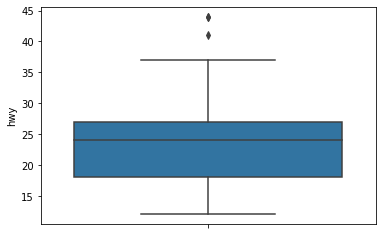

In [67]:
# 상자 그림으로 극단치 기준 정하기
mpg = pd.read_csv('../mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [68]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [69]:
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [70]:
# IQR(inter quartile range, 사분위 범위)
iqr = pct75 - pct25
iqr

9.0

In [71]:
# 극단치의 경계가 되는 하한과 상한
# 하한: 1사분위보다 'IQR의 1.5배'만큼 더 작은 값
# 상한: 3사분위수보다 'IQR의 1.5배'만큼 더 큰값
pct25 - 1.5 * iqr # 하한


4.5

In [72]:
pct75 + 1.5 * iqr # 상한

40.5

In [73]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

#결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [75]:
mpg.dropna(subset=['hwy']) \
    .groupby('drv') \
    .agg(mean_hwy=('hwy', 'mean'))


,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
